**2013 AMERICAN COMMUNITY SURVEY DATASET USING REGRESSION MODEL**

In [ ]:
#Upload your kaggle API json file:
from google.colab import files
files.upload()

In [ ]:
import os#importing libraries
import numpy as np
import pandas as pd

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d census/2013-american-community-survey

100% 912M/916M [00:12<00:00, 62.8MB/s]
100% 916M/916M [00:12<00:00, 79.4MB/s]


## *Define* the path and name of the directory to be created:

In [ ]:

#This is the path where we will extract the dataset:
path = "/content/2013-american-community-survey/"

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Successfully created the directory /content/2013-american-community-survey/ 


In [ ]:
#Extracts the data from the Zip file downloaded:
from zipfile import ZipFile
file_name = "2013-american-community-survey.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall(path = "/content/2013-american-community-survey")
  print('Done')

Done


In [ ]:
!sudo apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done


In [ ]:
!sudo apt-get install

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-3.0.2/spark-3.0.2-bin-hadoop2.7.tgz
!tar xf spark-3.0.2-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os#import os and hadoop spark path
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init("spark-3.0.2-bin-hadoop2.7")

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
from pyspark import SparkContext

### Creating dataframe to husa file


In [ ]:
df = spark.read.options(header='True',inferschema='True',delimiter=',').csv("/content/2013-american-community-survey/ss13husa.csv")



In [ ]:
df.printSchema()

root
 |-- RT: string (nullable = true)
 |-- SERIALNO: integer (nullable = true)
 |-- DIVISION: integer (nullable = true)
 |-- PUMA: integer (nullable = true)
 |-- REGION: integer (nullable = true)
 |-- ST: integer (nullable = true)
 |-- ADJHSG: integer (nullable = true)
 |-- ADJINC: integer (nullable = true)
 |-- WGTP: integer (nullable = true)
 |-- NP: integer (nullable = true)
 |-- TYPE: integer (nullable = true)
 |-- ACCESS: integer (nullable = true)
 |-- ACR: integer (nullable = true)
 |-- AGS: integer (nullable = true)
 |-- BATH: integer (nullable = true)
 |-- BDSP: integer (nullable = true)
 |-- BLD: integer (nullable = true)
 |-- BROADBND: integer (nullable = true)
 |-- BUS: integer (nullable = true)
 |-- COMPOTHX: integer (nullable = true)
 |-- CONP: integer (nullable = true)
 |-- DIALUP: integer (nullable = true)
 |-- DSL: integer (nullable = true)
 |-- ELEP: integer (nullable = true)
 |-- FIBEROP: integer (nullable = true)
 |-- FS: integer (nullable = true)
 |-- FULP: integer

In [ ]:
print(df.head(100))

[Row(RT='H', SERIALNO=84, DIVISION=6, PUMA=2600, REGION=3, ST=1, ADJHSG=1000000, ADJINC=1007549, WGTP=0, NP=1, TYPE=3, ACCESS=None, ACR=None, AGS=None, BATH=None, BDSP=None, BLD=None, BROADBND=None, BUS=None, COMPOTHX=None, CONP=None, DIALUP=None, DSL=None, ELEP=None, FIBEROP=None, FS=2, FULP=None, GASP=None, HANDHELD=None, HFL=None, INSP=None, LAPTOP=None, MHP=None, MODEM=None, MRGI=None, MRGP=None, MRGT=None, MRGX=None, OTHSVCEX=None, REFR=None, RMSP=None, RNTM=None, RNTP=None, RWAT=None, RWATPR=None, SATELLITE=None, SINK=None, SMP=None, STOV=None, TEL=None, TEN=None, TOIL=None, VACS=None, VALP=None, VEH=None, WATP=None, YBL=None, FES=None, FFINCP=None, FGRNTP=None, FHINCP=None, FINCP=None, FPARC=None, FSMOCP=None, GRNTP=None, GRPIP=None, HHL=None, HHT=None, HINCP=None, HUGCL=None, HUPAC=None, HUPAOC=None, HUPARC=None, KIT=None, LNGI=None, MULTG=None, MV=None, NOC=None, NPF=None, NPP=None, NR=None, NRC=None, OCPIP=None, PARTNER=None, PLM=None, PSF=None, R18=None, R60=None, R65=None, 

## Pre-processing and dealing with missing values:

In [ ]:
columns_to_drop=['FINCP']
df=df.drop(*columns_to_drop)#here we need to drop one column either HINCP or FINCP in the both files because they relate to the same content. 
#so we drop FINCP column and then adjust HINCP

In [ ]:
df.show()

+---+--------+--------+----+------+---+-------+-------+----+---+----+------+----+----+----+----+----+--------+----+--------+----+------+----+----+-------+---+----+----+--------+----+----+------+----+-----+----+----+----+----+--------+----+----+----+----+----+------+---------+----+----+----+----+----+----+----+------+----+----+----+----+------+------+------+-----+------+-----+-----+----+----+------+-----+-----+------+------+----+----+-----+----+----+----+----+----+----+-----+-------+----+----+----+----+----+-------+-----+----+----+----+----+----+----+-------+--------+--------+-----+-----+------+-----+-----+----------+-----+----------+-----+--------+-----+-----+---------+----+-----+-----+----------+-----+-----+-----+--------+----+-------+------+-----+------+------+----+----------+-----+------+-----+------+-----+------+--------+-----------+------+----+------+------+------+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-

In [ ]:
df.filter("HINCP is null").count()

135231

In [ ]:
df.count()

756065

In [ ]:
df.filter("ACR is null").count()

221274

In [ ]:
df= df.fillna({'HINCP':'1007549'})
df.show()#here we adjust all nulls with ADJINC to HINCP column 

+---+--------+--------+----+------+---+-------+-------+----+---+----+------+----+----+----+----+----+--------+----+--------+----+------+----+----+-------+---+----+----+--------+----+----+------+----+-----+----+----+----+----+--------+----+----+----+----+----+------+---------+----+----+----+----+----+----+----+------+----+----+----+----+------+------+------+-----+------+-----+-----+----+----+-------+-----+-----+------+------+----+----+-----+----+----+----+----+----+----+-----+-------+----+----+----+----+----+-------+-----+----+----+----+----+----+----+-------+--------+--------+-----+-----+------+-----+-----+----------+-----+----------+-----+--------+-----+-----+---------+----+-----+-----+----------+-----+-----+-----+--------+----+-------+------+-----+------+------+----+----------+-----+------+-----+------+-----+------+--------+-----------+------+----+------+------+------+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+

In [ ]:
df.filter("CONP is null").count()

726288

In [ ]:
df.filter("SMP is null").count()

705934

In [ ]:
df.filter("VACS is null").count()

696353

In [ ]:
df.filter("MRGP is null").count()

487479

In [ ]:
df.filter("INSP is null").count()

324309

In [ ]:
df.filter("VACS is null").count()

696353

In [ ]:
df = df.fillna({'CONP':'1000000','SMP':'1000000','MHP':'1000000','MRGP':'1000000','RNTP':'1000000','SMOCP':'1000000','INSP':'1000000'})
df.show()#some of the columns containing nulls value are adjusted to ADJHSG as per data description in the both files.


+---+--------+--------+----+------+---+-------+-------+----+---+----+------+----+----+----+----+----+--------+----+--------+-------+------+----+----+-------+---+----+----+--------+----+-------+------+-------+-----+----+-------+----+----+--------+----+----+----+-------+----+------+---------+----+-------+----+----+----+----+----+------+----+----+----+----+------+------+------+-----+------+-----+-----+----+----+-------+-----+-----+------+------+----+----+-----+----+----+----+----+----+----+-----+-------+----+----+----+----+----+-------+-------+----+----+----+----+----+----+-------+--------+--------+-----+-----+------+-----+-----+----------+-----+----------+-----+--------+-----+-----+---------+----+-----+-----+----------+-----+-----+-----+--------+----+-------+------+-----+------+------+----+----------+-----+------+-----+------+-----+------+--------+-----------+------+----+------+------+------+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----

In [ ]:
df=df.fillna({'ACR':'0','AGS':'0','BROADBND':'0','BUS':'0','DIALUP':'0','DSL':'0','FIBEROP':'0','VACS':'0','MODEM':'0','MRGI':'0','MRGT':'0','MRGX':'0','OTHSVCEX':'0','RNTM':'0','VALP':'0','SATELLITE':'0','FES':'0','FPARC':'0','GRPIP':'0','MV':'0','NPF':'0','OCPIP':'0','SMX':'0','TAXP':'0','WKEXREL':'0','WORKSTAT':'0','FGRNTP':'2','FSMOCP':'2','WIF':'4','GRNTP':'1000000'})
df.show()#same as here adjusting to constant values 


+---+--------+--------+----+------+---+-------+-------+----+---+----+------+---+---+----+----+----+--------+---+--------+-------+------+---+----+-------+---+----+----+--------+----+-------+------+-------+-----+----+-------+----+----+--------+----+----+----+-------+----+------+---------+----+-------+----+----+----+----+----+------+----+----+----+---+------+------+------+-----+------+-------+-----+----+----+-------+-----+-----+------+------+----+----+-----+---+----+---+----+----+----+-----+-------+----+----+----+----+----+-------+-------+---+----+----+----+----+---+-------+--------+--------+-----+-----+------+-----+-----+----------+-----+----------+-----+--------+-----+-----+---------+----+-----+-----+----------+-----+-----+-----+--------+----+-------+------+-----+------+------+----+----------+-----+------+-----+------+-----+------+--------+-----------+------+----+------+------+------+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

In [ ]:
df = df.fillna({'FACCESSP':'0','FACRP':'0','FAGSP':'0','FBATHP':'0','FBDSP':'0','FBLDP':'0','FBROADBNDP':'0','FBUSP':'0','FCOMPOTHXP':'0','FCONP':'0','FDIALUPP':'0','FDSLP':'0','FELEP':'0','FFIBEROPP':'0','FFULP':'0','FGASP':'0','FHANDHELDP':'0','FHFLP':'0','FINSP':'0','FKITP':'0','FLAPTOPP':'0','FMHP':'0','FMODEMP':'0','FMRGIP':'0','FMRGP':'0','FMRGTP':'0','FMRGXP':'0','FOTHSVCEXP':'0','FPLMP':'0','FREFRP':'0','FRMSP':'0','FRNTMP':'0','FRNTP':'0','FRWATP':'0','FRWATPRP':'0','FSATELLITEP':'0','FSINKP':'0','FSMP':'0','FSMXHP':'0','FSMXSP':'0','FSTOVP':'0','FTAXP':'0','FTELP':'0','FTENP':'0','FTOILP':'0','FVACSP':'0','FVALP':'0','FVEHP':'0','FWATP':'0','FYBLP':'0'})
              
df.show()

+---+--------+--------+----+------+---+-------+-------+----+---+----+------+---+---+----+----+----+--------+---+--------+-------+------+---+----+-------+---+----+----+--------+----+-------+------+-------+-----+----+-------+----+----+--------+----+----+----+-------+----+------+---------+----+-------+----+----+----+----+----+------+----+----+----+---+------+------+------+-----+------+-------+-----+----+----+-------+-----+-----+------+------+----+----+-----+---+----+---+----+----+----+-----+-------+----+----+----+----+----+-------+-------+---+----+----+----+----+---+-------+--------+--------+-----+-----+------+-----+-----+----------+-----+----------+-----+--------+-----+-----+---------+----+-----+-----+----------+-----+-----+-----+--------+----+-------+------+-----+------+------+----+----------+-----+------+-----+------+-----+------+--------+-----------+------+----+------+------+------+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

In [ ]:
df =df.fillna({'HUGCL':'3','NOC':'20','NPP':'3','PARTNER':'5','PSF':'3','R18':'3','R60':'3','R65':'3','SRNT':'3','SSMC':'3','SVAL':'3','BDSP':'100'})
df.show()#adjusting the values to constant dollars in both the files

+---+--------+--------+----+------+---+-------+-------+----+---+----+------+---+---+----+----+----+--------+---+--------+-------+------+---+----+-------+---+----+----+--------+----+-------+------+-------+-----+----+-------+----+----+--------+----+----+----+-------+----+------+---------+----+-------+----+----+----+----+----+------+----+----+----+---+------+------+------+-----+------+-------+-----+----+----+-------+-----+-----+------+------+----+----+-----+---+---+---+---+----+----+-----+-------+----+---+---+---+---+-------+-------+---+----+----+----+----+---+-------+--------+--------+-----+-----+------+-----+-----+----------+-----+----------+-----+--------+-----+-----+---------+----+-----+-----+----------+-----+-----+-----+--------+----+-------+------+-----+------+------+----+----------+-----+------+-----+------+-----+------+--------+-----------+------+----+------+------+------+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

In [ ]:
df =df.fillna({'ACCESS':'0','BATH':'0','BLD':'0','FS':'0','HANDHELD':'0','HFL':'0','LAPTOP':'0','REFR':'0','RMSP':'0','RWAT':'0','RWATPR':'0','SINK':'0','STOV':'0','TEL':'0','TEN':'0','TOIL':'0','VACS':'0','VEH':'0','YBL':'0','FFINCP':'0','FHINCP':'0','HHL':'0','HHT':'0','HUPAC':'0','HUPAOC':'0','KIT':'0','LNGI':'0','MULTG':'0','PLM':'0','RESMODE':'0','COMPOTHX':'0','HUPARC':'0','FULP':'0','WATP':'0','GASP':'0','ELEP':'0','NR':'2','NRC':'20'})
df.show()

+---+--------+--------+----+------+---+-------+-------+----+---+----+------+---+---+----+----+---+--------+---+--------+-------+------+---+----+-------+---+----+----+--------+---+-------+------+-------+-----+----+-------+----+----+--------+----+----+----+-------+----+------+---------+----+-------+----+---+---+----+----+------+---+----+---+---+------+------+------+-----+------+-------+-----+---+---+-------+-----+-----+------+------+---+----+-----+---+---+---+---+---+---+-----+-------+---+---+---+---+---+-------+-------+---+----+----+----+----+---+-------+--------+--------+-----+-----+------+-----+-----+----------+-----+----------+-----+--------+-----+-----+---------+----+-----+-----+----------+-----+-----+-----+--------+----+-------+------+-----+------+------+----+----------+-----+------+-----+------+-----+------+--------+-----------+------+----+------+------+------+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-----

In [ ]:
#Here we replace nulls with zero and the values >3 are adjusted to ADJHSG ie 1000000 as per data description 
from pyspark.sql.functions import when

Df1 = df.withColumn("ELEP", 
                    when(df["ELEP"] >= 3, 1000000).otherwise(df["ELEP"]))
Df2 = Df1.withColumn("GASP", 
                    when(df["GASP"] >= 3, 1000000).otherwise(df["GASP"]))


Df3 = Df2.withColumn("FULP", 
                    when(df["FULP"] >= 3, 1000000).otherwise(df["FULP"]))
Df4 = Df3.withColumn("WATP", 
                    when(df["WATP"] >= 3, 1000000).otherwise(df["WATP"]))


In [ ]:
Df4.columns

['RT',
 'SERIALNO',
 'DIVISION',
 'PUMA',
 'REGION',
 'ST',
 'ADJHSG',
 'ADJINC',
 'WGTP',
 'NP',
 'TYPE',
 'ACCESS',
 'ACR',
 'AGS',
 'BATH',
 'BDSP',
 'BLD',
 'BROADBND',
 'BUS',
 'COMPOTHX',
 'CONP',
 'DIALUP',
 'DSL',
 'ELEP',
 'FIBEROP',
 'FS',
 'FULP',
 'GASP',
 'HANDHELD',
 'HFL',
 'INSP',
 'LAPTOP',
 'MHP',
 'MODEM',
 'MRGI',
 'MRGP',
 'MRGT',
 'MRGX',
 'OTHSVCEX',
 'REFR',
 'RMSP',
 'RNTM',
 'RNTP',
 'RWAT',
 'RWATPR',
 'SATELLITE',
 'SINK',
 'SMP',
 'STOV',
 'TEL',
 'TEN',
 'TOIL',
 'VACS',
 'VALP',
 'VEH',
 'WATP',
 'YBL',
 'FES',
 'FFINCP',
 'FGRNTP',
 'FHINCP',
 'FPARC',
 'FSMOCP',
 'GRNTP',
 'GRPIP',
 'HHL',
 'HHT',
 'HINCP',
 'HUGCL',
 'HUPAC',
 'HUPAOC',
 'HUPARC',
 'KIT',
 'LNGI',
 'MULTG',
 'MV',
 'NOC',
 'NPF',
 'NPP',
 'NR',
 'NRC',
 'OCPIP',
 'PARTNER',
 'PLM',
 'PSF',
 'R18',
 'R60',
 'R65',
 'RESMODE',
 'SMOCP',
 'SMX',
 'SRNT',
 'SSMC',
 'SVAL',
 'TAXP',
 'WIF',
 'WKEXREL',
 'WORKSTAT',
 'FACCESSP',
 'FACRP',
 'FAGSP',
 'FBATHP',
 'FBDSP',
 'FBLDP',
 'FBROADBNDP

In [ ]:
df2= spark.read.options(header='True',inferschema='True',delimiter=',').csv('/content/2013-american-community-survey/ss13husb.csv')

In [ ]:
df2.show()

+---+--------+--------+----+------+---+-------+-------+----+---+----+------+----+----+----+----+----+--------+----+--------+----+------+----+----+-------+----+----+----+--------+----+----+------+----+-----+----+----+----+----+--------+----+----+----+----+----+------+---------+----+----+----+----+----+----+----+------+----+----+----+----+------+------+------+------+-----+------+-----+-----+----+----+------+-----+-----+------+------+----+----+-----+----+----+----+----+----+----+-----+-------+----+----+----+----+----+-------+-----+----+----+----+----+----+----+-------+--------+--------+-----+-----+------+-----+-----+----------+-----+----------+-----+--------+-----+-----+---------+----+-----+-----+----------+-----+-----+-----+--------+----+-------+------+-----+------+------+----+----------+-----+------+-----+------+-----+------+--------+-----------+------+----+------+------+------+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

In [ ]:
df2.count()

720248

In [ ]:
df2.filter('VACS is null').count()

663167

In [ ]:
df2.filter("HINCP is null").count()

129818

In [ ]:
df2= df2.fillna({'HINCP':'1007549'})
df2.show()

+---+--------+--------+----+------+---+-------+-------+----+---+----+------+----+----+----+----+----+--------+----+--------+----+------+----+----+-------+----+----+----+--------+----+----+------+----+-----+----+----+----+----+--------+----+----+----+----+----+------+---------+----+----+----+----+----+----+----+------+----+----+----+----+------+------+------+------+-----+------+-----+-----+----+----+-------+-----+-----+------+------+----+----+-----+----+----+----+----+----+----+-----+-------+----+----+----+----+----+-------+-----+----+----+----+----+----+----+-------+--------+--------+-----+-----+------+-----+-----+----------+-----+----------+-----+--------+-----+-----+---------+----+-----+-----+----------+-----+-----+-----+--------+----+-------+------+-----+------+------+----+----------+-----+------+-----+------+-----+------+--------+-----------+------+----+------+------+------+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----

In [ ]:
columns_to_drop=['FINCP']
df2=df2.drop(*columns_to_drop)
df2.show()

+---+--------+--------+----+------+---+-------+-------+----+---+----+------+----+----+----+----+----+--------+----+--------+----+------+----+----+-------+----+----+----+--------+----+----+------+----+-----+----+----+----+----+--------+----+----+----+----+----+------+---------+----+----+----+----+----+----+----+------+----+----+----+----+------+------+------+-----+------+-----+-----+----+----+-------+-----+-----+------+------+----+----+-----+----+----+----+----+----+----+-----+-------+----+----+----+----+----+-------+-----+----+----+----+----+----+----+-------+--------+--------+-----+-----+------+-----+-----+----------+-----+----------+-----+--------+-----+-----+---------+----+-----+-----+----------+-----+-----+-----+--------+----+-------+------+-----+------+------+----+----------+-----+------+-----+------+-----+------+--------+-----------+------+----+------+------+------+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------

In [ ]:
df2 = df2.fillna({'CONP':'1000000','SMP':'1000000','MHP':'1000000','MRGP':'1000000','RNTP':'1000000','SMOCP':'1000000','INSP':'1000000'})
df2.show()

+---+--------+--------+----+------+---+-------+-------+----+---+----+------+----+----+----+----+----+--------+----+--------+-------+------+----+----+-------+----+----+----+--------+----+-------+------+-------+-----+----+-------+----+----+--------+----+----+----+-------+----+------+---------+----+-------+----+----+----+----+----+------+----+----+----+----+------+------+------+-----+------+-----+-----+----+----+-------+-----+-----+------+------+----+----+-----+----+----+----+----+----+----+-----+-------+----+----+----+----+----+-------+-------+----+----+----+----+----+----+-------+--------+--------+-----+-----+------+-----+-----+----------+-----+----------+-----+--------+-----+-----+---------+----+-----+-----+----------+-----+-----+-----+--------+----+-------+------+-----+------+------+----+----------+-----+------+-----+------+-----+------+--------+-----------+------+----+------+------+------+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----

In [ ]:
df2.count()

720248

In [ ]:
df2 =df2.fillna({'ACCESS':'0','BATH':'0','BLD':'0','FS':'0','HANDHELD':'0','HFL':'0','LAPTOP':'0','REFR':'0','RMSP':'0','RWAT':'0','RWATPR':'0','SINK':'0','STOV':'0','TEL':'0','TEN':'0','TOIL':'0','VACS':'0','VEH':'0','YBL':'0','FFINCP':'0','FHINCP':'0','HHL':'0','HHT':'0','HUPAC':'0','HUPAOC':'0','KIT':'0','LNGI':'0','MULTG':'0','PLM':'0','RESMODE':'0'})
df2.show()

+---+--------+--------+----+------+---+-------+-------+----+---+----+------+----+----+----+----+---+--------+----+--------+-------+------+----+----+-------+---+----+----+--------+---+-------+------+-------+-----+----+-------+----+----+--------+----+----+----+-------+----+------+---------+----+-------+----+---+---+----+----+------+---+----+---+----+------+------+------+-----+------+-----+-----+---+---+-------+-----+-----+------+------+---+----+-----+----+----+----+----+----+----+-----+-------+---+----+----+----+----+-------+-------+----+----+----+----+----+----+-------+--------+--------+-----+-----+------+-----+-----+----------+-----+----------+-----+--------+-----+-----+---------+----+-----+-----+----------+-----+-----+-----+--------+----+-------+------+-----+------+------+----+----------+-----+------+-----+------+-----+------+--------+-----------+------+----+------+------+------+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+---

In [ ]:
df2 = df2.fillna({'FACCESSP':'0','FACRP':'0','FAGSP':'0','FBATHP':'0','FBDSP':'0','FBLDP':'0','FBROADBNDP':'0','FBUSP':'0','FCOMPOTHXP':'0','FCONP':'0','FDIALUPP':'0','FDSLP':'0','FELEP':'0','FFIBEROPP':'0','FFULP':'0','FGASP':'0','FHANDHELDP':'0','FHFLP':'0','FINSP':'0','FKITP':'0','FLAPTOPP':'0','FMHP':'0','FMODEMP':'0','FMRGIP':'0','FMRGP':'0','FMRGTP':'0','FMRGXP':'0','FOTHSVCEXP':'0','FPLMP':'0','FREFRP':'0','FRMSP':'0','FRNTMP':'0','FRNTP':'0','FRWATP':'0','FRWATPRP':'0','FSATELLITEP':'0','FSINKP':'0','FSMP':'0','FSMXHP':'0','FSMXSP':'0','FSTOVP':'0','FTAXP':'0','FTELP':'0','FTENP':'0','FTOILP':'0','FVACSP':'0','FVALP':'0','FVEHP':'0','FWATP':'0','FYBLP':'0'})
              
df2.show()

+---+--------+--------+----+------+---+-------+-------+----+---+----+------+----+----+----+----+---+--------+----+--------+-------+------+----+----+-------+---+----+----+--------+---+-------+------+-------+-----+----+-------+----+----+--------+----+----+----+-------+----+------+---------+----+-------+----+---+---+----+----+------+---+----+---+----+------+------+------+-----+------+-----+-----+---+---+-------+-----+-----+------+------+---+----+-----+----+----+----+----+----+----+-----+-------+---+----+----+----+----+-------+-------+----+----+----+----+----+----+-------+--------+--------+-----+-----+------+-----+-----+----------+-----+----------+-----+--------+-----+-----+---------+----+-----+-----+----------+-----+-----+-----+--------+----+-------+------+-----+------+------+----+----------+-----+------+-----+------+-----+------+--------+-----------+------+----+------+------+------+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+---

In [ ]:
df2 =df2.fillna({'GRNTP':'1000000','HUGCL':'3','NOC':'20','NPP':'3','PARTNER':'5','PSF':'3','R18':'3','R60':'3','R65':'3','SRNT':'3','SSMC':'3','SVAL':'3'})
df2.show()

+---+--------+--------+----+------+---+-------+-------+----+---+----+------+----+----+----+----+---+--------+----+--------+-------+------+----+----+-------+---+----+----+--------+---+-------+------+-------+-----+----+-------+----+----+--------+----+----+----+-------+----+------+---------+----+-------+----+---+---+----+----+------+---+----+---+----+------+------+------+-----+------+-------+-----+---+---+-------+-----+-----+------+------+---+----+-----+----+---+----+---+----+----+-----+-------+---+---+---+---+---+-------+-------+----+----+----+----+----+----+-------+--------+--------+-----+-----+------+-----+-----+----------+-----+----------+-----+--------+-----+-----+---------+----+-----+-----+----------+-----+-----+-----+--------+----+-------+------+-----+------+------+----+----------+-----+------+-----+------+-----+------+--------+-----------+------+----+------+------+------+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-

In [ ]:
df2 =df2.fillna({'ACR':'0','AGS':'0','BROADBND':'0','BUS':'0','COMPOTHX':'0','DIALUP':'0','DSL':'0','FIBEROP':'0','MODEM':'0','MRGI':'0','MRGT':'0','MRGX':'0','OTHSVCEX':'0','RNTM':'0','VALP':'0','SATELLITE':'0','FES':'0','FPARC':'0','FGRNTP':'2','FSMOCP':'2','GRPIP':'0','HUPARC':'0','MV':'0','NPF':'0','NR':'2','NRC':'20','OCPIP':'0','SMX':'0','TAXP':'0','WIF':'4','WKEXREL':'0','WORKSTAT':'0','FULP':'0','WATP':'0','GASP':'0','ELEP':'0','BDSP':'100'})
df2.show()

+---+--------+--------+----+------+---+-------+-------+----+---+----+------+---+---+----+----+---+--------+---+--------+-------+------+---+----+-------+---+----+----+--------+---+-------+------+-------+-----+----+-------+----+----+--------+----+----+----+-------+----+------+---------+----+-------+----+---+---+----+----+------+---+----+---+---+------+------+------+-----+------+-------+-----+---+---+-------+-----+-----+------+------+---+----+-----+---+---+---+---+---+---+-----+-------+---+---+---+---+---+-------+-------+---+----+----+----+----+---+-------+--------+--------+-----+-----+------+-----+-----+----------+-----+----------+-----+--------+-----+-----+---------+----+-----+-----+----------+-----+-----+-----+--------+----+-------+------+-----+------+------+----+----------+-----+------+-----+------+-----+------+--------+-----------+------+----+------+------+------+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-----

In [ ]:
df2.show()

+---+--------+--------+----+------+---+-------+-------+----+---+----+------+---+---+----+----+---+--------+---+--------+-------+------+---+----+-------+---+----+----+--------+---+-------+------+-------+-----+----+-------+----+----+--------+----+----+----+-------+----+------+---------+----+-------+----+---+---+----+----+------+---+----+---+---+------+------+------+-----+------+-------+-----+---+---+-------+-----+-----+------+------+---+----+-----+---+---+---+---+---+---+-----+-------+---+---+---+---+---+-------+-------+---+----+----+----+----+---+-------+--------+--------+-----+-----+------+-----+-----+----------+-----+----------+-----+--------+-----+-----+---------+----+-----+-----+----------+-----+-----+-----+--------+----+-------+------+-----+------+------+----+----------+-----+------+-----+------+-----+------+--------+-----------+------+----+------+------+------+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-----

In [ ]:
 Df5= df2.withColumn("ELEP", 
                    when(df2["ELEP"] >= 3, 1000000).otherwise(df2["ELEP"]))
 Df6= Df5.withColumn("FULP", 
                    when(df2["FULP"] >= 3, 1000000).otherwise(df2["FULP"]))
 Df7= Df6.withColumn("GASP", 
                    when(df2["GASP"] >= 3, 1000000).otherwise(df2["GASP"]))
 Df8= Df7.withColumn("WATP", 
                    when(df2["WATP"] >= 3, 1000000).otherwise(df2["WATP"]))


Df8.head(1)

[Row(RT='H', SERIALNO=76, DIVISION=4, PUMA=1802, REGION=2, ST=29, ADJHSG=1000000, ADJINC=1007549, WGTP=229, NP=2, TYPE=1, ACCESS=3, ACR=0, AGS=0, BATH=1, BDSP=2, BLD=7, BROADBND=0, BUS=0, COMPOTHX=2, CONP=1000000, DIALUP=0, DSL=0, ELEP=1000000, FIBEROP=0, FS=2, FULP=2, GASP=1000000, HANDHELD=1, HFL=3, INSP=1000000, LAPTOP=1, MHP=1000000, MODEM=0, MRGI=0, MRGP=1000000, MRGT=0, MRGX=0, OTHSVCEX=0, REFR=1, RMSP=4, RNTM=2, RNTP=720, RWAT=1, RWATPR=9, SATELLITE=0, SINK=1, SMP=1000000, STOV=1, TEL=1, TEN=3, TOIL=1, VACS=0, VALP=0, VEH=2, WATP=1000000, YBL=5, FES=0, FFINCP=0, FGRNTP=0, FHINCP=1, FPARC=0, FSMOCP=2, GRNTP=830, GRPIP=27, HHL=1, HHT=5, HINCP=37100, HUGCL=0, HUPAC=4, HUPAOC=4, HUPARC=4, KIT=1, LNGI=1, MULTG=1, MV=1, NOC=0, NPF=0, NPP=0, NR=1, NRC=0, OCPIP=0, PARTNER=0, PLM=1, PSF=0, R18=0, R60=0, R65=0, RESMODE=2, SMOCP=1000000, SMX=0, SRNT=1, SSMC=0, SVAL=0, TAXP=0, WIF=4, WKEXREL=0, WORKSTAT=0, FACCESSP=0, FACRP=0, FAGSP=0, FBATHP=0, FBDSP=0, FBLDP=0, FBROADBNDP=0, FBUSP=0, FCOM

### **Merging two dataframes**

In [ ]:


df_final=Df8.unionAll(Df4)

In [ ]:
df_final.printSchema()

root
 |-- RT: string (nullable = true)
 |-- SERIALNO: integer (nullable = true)
 |-- DIVISION: integer (nullable = true)
 |-- PUMA: integer (nullable = true)
 |-- REGION: integer (nullable = true)
 |-- ST: integer (nullable = true)
 |-- ADJHSG: integer (nullable = true)
 |-- ADJINC: integer (nullable = true)
 |-- WGTP: integer (nullable = true)
 |-- NP: integer (nullable = true)
 |-- TYPE: integer (nullable = true)
 |-- ACCESS: integer (nullable = true)
 |-- ACR: integer (nullable = true)
 |-- AGS: integer (nullable = true)
 |-- BATH: integer (nullable = true)
 |-- BDSP: integer (nullable = true)
 |-- BLD: integer (nullable = true)
 |-- BROADBND: integer (nullable = true)
 |-- BUS: integer (nullable = true)
 |-- COMPOTHX: integer (nullable = true)
 |-- CONP: integer (nullable = true)
 |-- DIALUP: integer (nullable = true)
 |-- DSL: integer (nullable = true)
 |-- ELEP: integer (nullable = true)
 |-- FIBEROP: integer (nullable = true)
 |-- FS: integer (nullable = true)
 |-- FULP: integer

In [ ]:
df_final.count()

1476313

In [ ]:
df_final.head()

Row(RT='H', SERIALNO=76, DIVISION=4, PUMA=1802, REGION=2, ST=29, ADJHSG=1000000, ADJINC=1007549, WGTP=229, NP=2, TYPE=1, ACCESS=3, ACR=0, AGS=0, BATH=1, BDSP=2, BLD=7, BROADBND=0, BUS=0, COMPOTHX=2, CONP=1000000, DIALUP=0, DSL=0, ELEP=1000000, FIBEROP=0, FS=2, FULP=2, GASP=1000000, HANDHELD=1, HFL=3, INSP=1000000, LAPTOP=1, MHP=1000000, MODEM=0, MRGI=0, MRGP=1000000, MRGT=0, MRGX=0, OTHSVCEX=0, REFR=1, RMSP=4, RNTM=2, RNTP=720, RWAT=1, RWATPR=9, SATELLITE=0, SINK=1, SMP=1000000, STOV=1, TEL=1, TEN=3, TOIL=1, VACS=0, VALP=0, VEH=2, WATP=1000000, YBL=5, FES=0, FFINCP=0, FGRNTP=0, FHINCP=1, FPARC=0, FSMOCP=2, GRNTP=830, GRPIP=27, HHL=1, HHT=5, HINCP=37100, HUGCL=0, HUPAC=4, HUPAOC=4, HUPARC=4, KIT=1, LNGI=1, MULTG=1, MV=1, NOC=0, NPF=0, NPP=0, NR=1, NRC=0, OCPIP=0, PARTNER=0, PLM=1, PSF=0, R18=0, R60=0, R65=0, RESMODE=2, SMOCP=1000000, SMX=0, SRNT=1, SSMC=0, SVAL=0, TAXP=0, WIF=4, WKEXREL=0, WORKSTAT=0, FACCESSP=0, FACRP=0, FAGSP=0, FBATHP=0, FBDSP=0, FBLDP=0, FBROADBNDP=0, FBUSP=0, FCOMP

## Overview:

We have selected "HINCP" house income as a target variable (label), rest of the labels are droped.

## Feature extraction and assembling:

In [ ]:
## Importing spark ML modules

from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler




## Assembling the featuresby using Vector Assembler in vector matrix excluding "RT" and targeted variable "HINCP".

assembler = VectorAssembler(inputCols=['SERIALNO',
 'DIVISION',
 'PUMA',
 'REGION',
 'ST',
 'ADJHSG',
 'ADJINC',
 'WGTP',
 'NP',
 'TYPE',
 'ACCESS',
 'ACR',
 'AGS',
 'BATH',
 'BDSP',
 'BLD',
 'BROADBND',
 'BUS',
 'COMPOTHX',
 'CONP',
 'DIALUP',
 'DSL',
 'ELEP',
 'FIBEROP',
 'FS',
 'FULP',
 'GASP',
 'HANDHELD',
 'HFL',
 'INSP',
 'LAPTOP',
 'MHP',
 'MODEM',
 'MRGI',
 'MRGP',
 'MRGT',
 'MRGX',
 'OTHSVCEX',
 'REFR',
 'RMSP',
 'RNTM',
 'RNTP',
 'RWAT',
 'RWATPR',
 'SATELLITE',
 'SINK',
 'SMP',
 'STOV',
 'TEL',
 'TEN',
 'TOIL',
 'VACS',
 'VALP',
 'VEH',
 'WATP',
 'YBL',
 'FES',
 'FFINCP',
 'FGRNTP',
 'FHINCP',
 'FPARC',
 'FSMOCP',
 'GRNTP',
 'GRPIP',
 'HHL',
 'HHT',
 'HUGCL',
 'HUPAC',
 'HUPAOC',
 'HUPARC',
 'KIT',
 'LNGI',
 'MULTG',
 'MV',
 'NOC',
 'NPF',
 'NPP',
 'NR',
 'NRC',
 'OCPIP',
 'PARTNER',
 'PLM',
 'PSF',
 'R18',
 'R60',
 'R65',
 'RESMODE',
 'SMOCP',
 'SMX',
 'SRNT',
 'SSMC',
 'SVAL',
 'TAXP',
 'WIF',
 'WKEXREL',
 'WORKSTAT',
 'FACCESSP',
 'FACRP',
 'FAGSP',
 'FBATHP',
 'FBDSP',
 'FBLDP',
 'FBROADBNDP',
 'FBUSP',
 'FCOMPOTHXP',
 'FCONP',
 'FDIALUPP',
 'FDSLP',
 'FELEP',
 'FFIBEROPP',
 'FFSP',
 'FFULP',
 'FGASP',
 'FHANDHELDP',
 'FHFLP',
 'FINSP',
 'FKITP',
 'FLAPTOPP',
 'FMHP',
 'FMODEMP',
 'FMRGIP',
 'FMRGP',
 'FMRGTP',
 'FMRGXP',
 'FMVP',
 'FOTHSVCEXP',
 'FPLMP',
 'FREFRP',
 'FRMSP',
 'FRNTMP',
 'FRNTP',
 'FRWATP',
 'FRWATPRP',
 'FSATELLITEP',
 'FSINKP',
 'FSMP',
 'FSMXHP',
 'FSMXSP',
 'FSTOVP',
 'FTAXP',
 'FTELP',
 'FTENP',
 'FTOILP',
 'FVACSP',
 'FVALP',
 'FVEHP',
 'FWATP',
 'FYBLP',
 'wgtp1',
 'wgtp2',
 'wgtp3',
 'wgtp4',
 'wgtp5',
 'wgtp6',
 'wgtp7',
 'wgtp8',
 'wgtp9',
 'wgtp10',
 'wgtp11',
 'wgtp12',
 'wgtp13',
 'wgtp14',
 'wgtp15',
 'wgtp16',
 'wgtp17',
 'wgtp18',
 'wgtp19',
 'wgtp20',
 'wgtp21',
 'wgtp22',
 'wgtp23',
 'wgtp24',
 'wgtp25',
 'wgtp26',
 'wgtp27',
 'wgtp28',
 'wgtp29',
 'wgtp30',
 'wgtp31',
 'wgtp32',
 'wgtp33',
 'wgtp34',
 'wgtp35',
 'wgtp36',
 'wgtp37',
 'wgtp38',
 'wgtp39',
 'wgtp40',
 'wgtp41',
 'wgtp42',
 'wgtp43',
 'wgtp44',
 'wgtp45',
 'wgtp46',
 'wgtp47',
 'wgtp48',
 'wgtp49',
 'wgtp50',
 'wgtp51',
 'wgtp52',
 'wgtp53',
 'wgtp54',
 'wgtp55',
 'wgtp56',
 'wgtp57',
 'wgtp58',
 'wgtp59',
 'wgtp60',
 'wgtp61',
 'wgtp62',
 'wgtp63',
 'wgtp64',
 'wgtp65',
 'wgtp66',
 'wgtp67',
 'wgtp68',
 'wgtp69',
 'wgtp70',
 'wgtp71',
 'wgtp72',
 'wgtp73',
 'wgtp74',
 'wgtp75',
 'wgtp76',
 'wgtp77',
 'wgtp78',
 'wgtp79',
 'wgtp80'], outputCol="features", handleInvalid='error')

## Transforming the dataframe

output=assembler.transform(df_final)
output.show()

+---+--------+--------+----+------+---+-------+-------+----+---+----+------+---+---+----+----+---+--------+---+--------+-------+------+---+-------+-------+---+----+-------+--------+---+-------+------+-------+-----+----+-------+----+----+--------+----+----+----+-------+----+------+---------+----+-------+----+---+---+----+----+------+---+-------+---+---+------+------+------+-----+------+-------+-----+---+---+-------+-----+-----+------+------+---+----+-----+---+---+---+---+---+---+-----+-------+---+---+---+---+---+-------+-------+---+----+----+----+----+---+-------+--------+--------+-----+-----+------+-----+-----+----------+-----+----------+-----+--------+-----+-----+---------+----+-----+-----+----------+-----+-----+-----+--------+----+-------+------+-----+------+------+----+----------+-----+------+-----+------+-----+------+--------+-----------+------+----+------+------+------+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+---

In [ ]:
output.printSchema

<bound method DataFrame.printSchema of DataFrame[RT: string, SERIALNO: int, DIVISION: int, PUMA: int, REGION: int, ST: int, ADJHSG: int, ADJINC: int, WGTP: int, NP: int, TYPE: int, ACCESS: int, ACR: int, AGS: int, BATH: int, BDSP: int, BLD: int, BROADBND: int, BUS: int, COMPOTHX: int, CONP: int, DIALUP: int, DSL: int, ELEP: int, FIBEROP: int, FS: int, FULP: int, GASP: int, HANDHELD: int, HFL: int, INSP: int, LAPTOP: int, MHP: int, MODEM: int, MRGI: int, MRGP: int, MRGT: int, MRGX: int, OTHSVCEX: int, REFR: int, RMSP: int, RNTM: int, RNTP: int, RWAT: int, RWATPR: int, SATELLITE: int, SINK: int, SMP: int, STOV: int, TEL: int, TEN: int, TOIL: int, VACS: int, VALP: int, VEH: int, WATP: int, YBL: int, FES: int, FFINCP: int, FGRNTP: int, FHINCP: int, FPARC: int, FSMOCP: int, GRNTP: int, GRPIP: int, HHL: int, HHT: int, HINCP: int, HUGCL: int, HUPAC: int, HUPAOC: int, HUPARC: int, KIT: int, LNGI: int, MULTG: int, MV: int, NOC: int, NPF: int, NPP: int, NR: int, NRC: int, OCPIP: int, PARTNER: in

## Spliting the dataset:

In [ ]:
## Spiting the datframe into ratio (80:20)

(train,test) = output.randomSplit([0.80,0.20])

In [ ]:
df_final.select("HINCP").head()

Row(HINCP=37100)

## Machine learning:

### Linear regression using ridge normalization.

#### When lambda > 0 ( i.e. regParam >0 ) and alpha = 0 ( i.e. elasticNetParam =0 ) , 
#### then the penalty is an L2 penalty
#### Which is condition for Ridge regression.

In [ ]:
lr = LinearRegression(featuresCol="features", labelCol="HINCP", predictionCol="prediction", maxIter=100,
regParam=0.1, elasticNetParam=0.0, tol=1e-6, fitIntercept=True, standardization=True, solver="auto",
aggregationDepth=2)

### Training the model:

In [ ]:
## Training the Regression model

training = lr.fit(train)

### Training Summary:

In [ ]:
## Summary of trained model

trainingSummary = training.summary

print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 52880.260348
r2: 0.979062


### RMSE(Root mean squared error):

We have got high RMSE value, but given the data available we have some outliers .Therefore, RMSE is not a desirable evaluation metric. 

In [ ]:
# Statistics of Label variable

train.select("HINCP").describe().show()

+-------+-----------------+
|summary|            HINCP|
+-------+-----------------+
|  count|          1181585|
|   mean|242595.3966688812|
| stddev|365450.0964987261|
|    min|           -16800|
|    max|          2090000|
+-------+-----------------+



As we can see the standard deviation value is very high, either we can drop them from results or we can keep them. Droping them will get the RMSE value to minimum but with the cost of information loss. If wee keep them we have to accept the cost for high RMSE. its is a tradeoff of scalability and precision.
we will compare the statistics of actual and predicted values .

## Testing:

In [ ]:
## Testing the trained model

testing = training.transform(test)


## Evaluation:

In [ ]:

from pyspark.ml.evaluation import RegressionEvaluator

lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="HINCP",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(testing))

R Squared (R2) on test data = 0.979385


## Comparison :

In [ ]:
testing.select("HINCP","prediction").describe().show()

+-------+------------------+------------------+
|summary|             HINCP|        prediction|
+-------+------------------+------------------+
|  count|            294728|            294728|
|   mean|242671.21633166852| 242657.6571147631|
| stddev|365561.63022307784| 361733.1421217118|
|    min|            -19770|-138887.5972205232|
|    max|           2014000|1344485.9354856391|
+-------+------------------+------------------+



As we can see the comparison of actual and predicted label, mean is almost same and stddv is less then the actual which implies to more precise our model is.

## EDA (Expolatory data analysis) of Model:

In [ ]:


## Ploting the Actual ("HICNP") and Prediction

# Converting spark dataframe to Pandas for visulaizations

comparison = testing.select("HINCP","prediction").toPandas()

## Sampling to limit the records bieng loaded to driver memory

comparison=comparison.sample(500)

## Importing python libraries for visualizations

import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use(style="seaborn")
%matplotlib inline




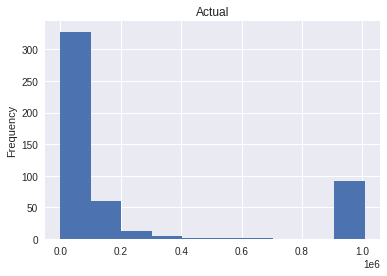

In [ ]:
## Ploting House income
## We can see the data concentration and frequency

comparison["HINCP"].plot(kind ='hist',title = 'Actual',);


               fig: The actual values

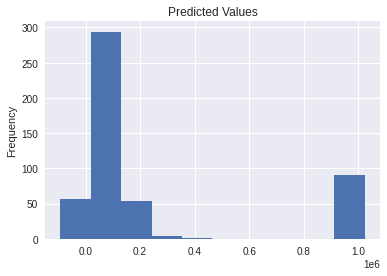

In [ ]:
## Ploting predicted values

comparison["prediction"].plot(kind='hist', title = 'Predicted Values');

            fig: The predicted values

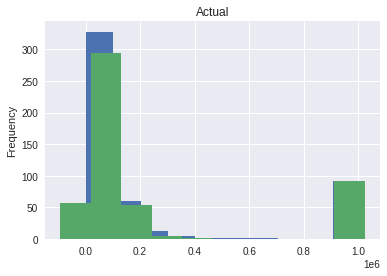

In [ ]:
## Comparing both Actual and predicted values

comparison["HINCP"].plot(kind ='hist',title = 'Actual',);
comparison["prediction"].plot(kind='hist',ylabel = 'predicted');

             fig: Comparison

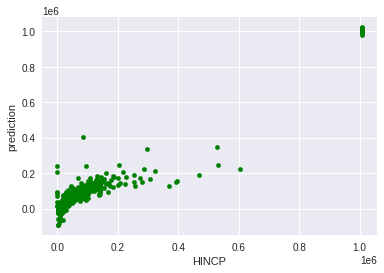

In [ ]:
## scater plot for outliers indentification 

ax1 = comparison.plot.scatter(x='HINCP',
                      y='prediction',
                      c='green')

                fig:Outliers, 
RMSE is not a good metric to evaluate the model for this case. 